In [1]:
import os
import pandas as pd

In [2]:
annotations_1 = os.path.join(os.getcwd(), "PPG_dataset", "gamer1-annotations.csv")
ppg1 = os.path.join(os.getcwd(), "PPG_dataset", "gamer1-ppg-2000-01-01.csv")
df_annotations_1 = pd.read_csv(annotations_1)
df_ppg1 = pd.read_csv(ppg1)
df_annotations_1

,Datetime,Event,Value
0,2000-01-01T11:00:00,Stanford Sleepiness Self-Assessment (1-7),3
1,2000-01-01T12:00:00,Stanford Sleepiness Self-Assessment (1-7),2
2,2000-01-01T13:00:00,Stanford Sleepiness Self-Assessment (1-7),2
3,2000-01-01T14:00:00,Stanford Sleepiness Self-Assessment (1-7),2
4,2000-01-01T15:00:00,Stanford Sleepiness Self-Assessment (1-7),3
...,...,...,...
80,2000-01-02T09:16:00,Diary Entry (text),Break
81,2000-01-02T09:19:00,Diary Entry (text),Anime
82,2000-01-02T09:47:00,Diary Entry (text),Nap
83,2000-01-02T10:01:00,Diary Entry (text),Anime


In [3]:
df_annotations_1_datetime = pd.to_datetime(df_annotations_1['Datetime'])
df_annotations_1_datetime

0    2000-01-01 11:00:00
1    2000-01-01 12:00:00
2    2000-01-01 13:00:00
3    2000-01-01 14:00:00
4    2000-01-01 15:00:00
             ...        
80   2000-01-02 09:16:00
81   2000-01-02 09:19:00
82   2000-01-02 09:47:00
83   2000-01-02 10:01:00
84   2000-01-02 11:00:00
Name: Datetime, Length: 85, dtype: datetime64[ns]

In [4]:
annotations_sorted_1 = df_annotations_1.sort_values(by = 'Datetime')
annotations_sorted_1 = annotations_sorted_1.reset_index(drop = True)
annotations_sorted_1

,Datetime,Event,Value
0,2000-01-01T11:00:00,Stanford Sleepiness Self-Assessment (1-7),3
1,2000-01-01T11:04:00,Sleep-2-Peak Reaction Time (ms),323
2,2000-01-01T11:30:00,Diary Entry (text),Hearthstone
3,2000-01-01T12:00:00,Stanford Sleepiness Self-Assessment (1-7),2
4,2000-01-01T12:00:00,Diary Entry (text),Lunch
...,...,...,...
80,2000-01-02T10:01:00,Diary Entry (text),Anime
81,2000-01-02T10:02:00,Sleep-2-Peak Reaction Time (ms),302
82,2000-01-02T11:00:00,Diary Entry (text),Done
83,2000-01-02T11:00:00,Stanford Sleepiness Self-Assessment (1-7),2


In [5]:
annotations_sorted_1.to_csv("sorted_1_annotations.csv")

In [6]:
#just trying to split them here (we won't be needing this)
#annotations_day_1 = df_annotations_1_datetime[df_annotations_1_datetime.dt.date == pd.to_datetime('2000-01-01').date()]
#annotations_day_1

In [7]:
filename = os.path.join(os.getcwd(), "PPG_dataset", "gamer1-ppg-2000-01-01.csv")
df_ppg = pd.read_csv(filename)
df_ppg

,Time,Red_Signal
0,12:54:40.369052,705
1,12:54:40.369900,559
2,12:54:40.369900,438
3,12:54:40.370917,334
4,12:54:40.370917,254
...,...,...
2996495,23:59:52.436623,468
2996496,23:59:52.452634,467
2996497,23:59:52.452634,468
2996498,23:59:52.468647,467


In [8]:
df_ppg['Time'] = "2000-01-01T" + df_ppg['Time']
df_ppg

,Time,Red_Signal
0,2000-01-01T12:54:40.369052,705
1,2000-01-01T12:54:40.369900,559
2,2000-01-01T12:54:40.369900,438
3,2000-01-01T12:54:40.370917,334
4,2000-01-01T12:54:40.370917,254
...,...,...
2996495,2000-01-01T23:59:52.436623,468
2996496,2000-01-01T23:59:52.452634,467
2996497,2000-01-01T23:59:52.452634,468
2996498,2000-01-01T23:59:52.468647,467


In [9]:
#visualization of sleepiness self-assessment and sleep-2-peak
#sss = sleepiness self-assessment
sss_1 = annotations_sorted_1[annotations_sorted_1.Event == "Stanford Sleepiness Self-Assessment (1-7)"].drop('Event', axis = 1).copy()
sss_1['SelfAssess'] = sss_1['Value'].map(lambda x: float(x))
sss_1['SelfAssess']

#reaction_time = Sleep-2-Peak Reaction Time (ms)
reaction_time_1 = annotations_sorted_1[annotations_sorted_1.Event == "Sleep-2-Peak Reaction Time (ms)"].drop('Event', axis = 1).copy()
reaction_time_1['ReactTime'] = reaction_time_1['Value'].map(lambda x: float(x))
reaction_time_1['ReactTime']

#drop diary entry


1     323.0
5     286.0
8     291.0
11    269.0
15    299.0
18    302.0
21    315.0
24    280.0
28    299.0
30    266.0
34    262.0
37    271.0
39    253.0
44    275.0
47    299.0
50    276.0
54    274.0
58    312.0
60    314.0
63    316.0
66    262.0
70    302.0
75    308.0
81    302.0
84    243.0
Name: ReactTime, dtype: float64

In [10]:
import matplotlib.pyplot as plt

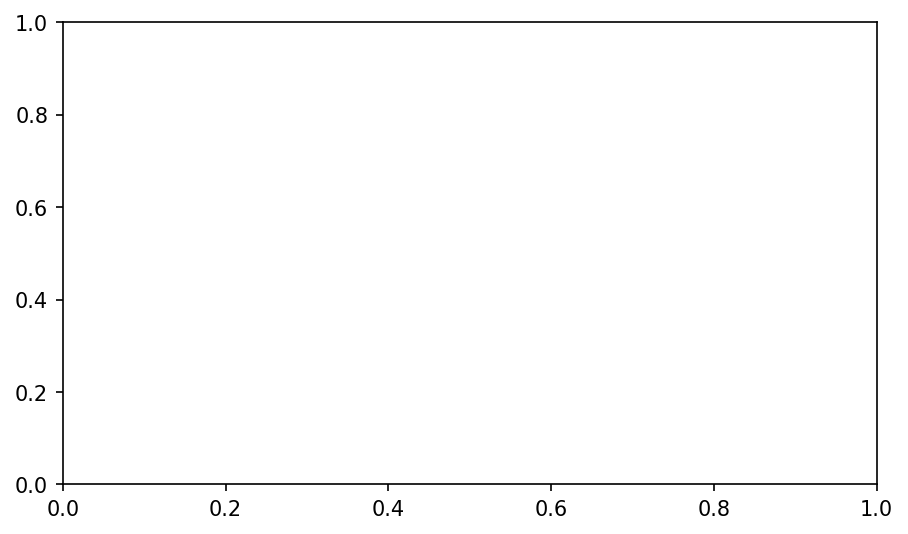

In [11]:
fatigueplot = plt.figure(figsize = (7,4), dpi = 150)
#sleepiness
primary_axis = fatigueplot.add_subplot(1,1,1)

In [12]:
primary_axis.set_title('Sleepiness of gamer #1 through episode')
primary_axis.set_xlabel ('Time of day')
primary_axis.set_ylabel('Sleepiness self assessment (1-7)', color = 'b')

Text(6.666666666666645, 0.5, 'Sleepiness self assessment (1-7)')

In [13]:
#time axis formatting

